# Fibonachi

In [1]:
import matplotlib.pyplot as plt

Define a decorator to count function calls.

In [171]:
def count_calls(counter):
    def decorator(func):
        def wrapper(x):
            counter[x] = 1 if x not in counter else counter[x]+1
            return func(x)
        return wrapper
    return decorator

## Recursive Algorithm

Recursive algorithm with no optimization.  
T(n) = O(2^n)

In [175]:
def Recursive_fib(x):
    counter = {}
    @count_calls(counter)
    def fib_recur(x):
        if x == 0 or x == 1:
            return 1
        else:
            return fib_recur(x-1) + fib_recur(x-2)
    return fib_recur(x),counter

The value of 30th Fibonachi is:

In [259]:
x,recur_count_10 = Recursive_fib(10)
print("The value is:",x)

The value is: 89


### Number of function calls for Recursive Algorithm for each value


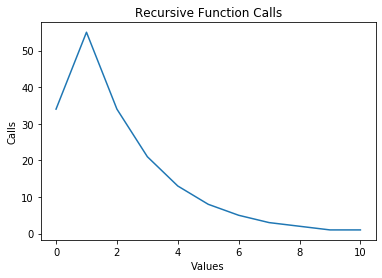

In [260]:
values, calls = zip(*sorted(recur_count_10.items()))
plt.plot(values, calls)
plt.xlabel('Values')
plt.ylabel('Calls')
plt.title('Recursive Function Calls')
plt.show()

## Memoizing Algorithm

Recursive algorithm using a cache dictionary to memoising the results and speed up.  
T(n) = O(n)

In [179]:
def Memoizing_fib(x):
    counter = {}
    cache = {}
    @count_calls(counter)
    def fib_memo(x):
        if x in cache:
            return cache[x]
        else:
            if x == 0 or x == 1:
                cache[x] = 1
                return cache[x]
            else:
                cache[x] = fib_memo(x-1) + fib_memo(x-2)
                return cache[x]
    return fib_memo(x),counter

The value of 3th Fibonachi:

In [257]:
x, memo_count_10 = Memoizing_fib(10)
print("The value is:",x)

The value is: 89


### Number of function calls for memoizing Algorithm.


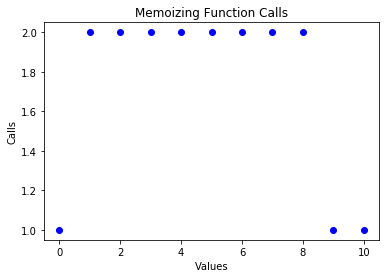

In [258]:
values, calls = zip(*sorted(memo_count_10.items()))
plt.plot(values, calls,'bo')
plt.xlabel('Values')
plt.ylabel('Calls')
plt.title('Memoizing Function Calls')
plt.show()

## Comparing Two Algorithm

Defining a function to calcute total function call.

In [198]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

In [261]:
total_recur_10 = get_total(recur_count_10)
total_memo_10 = get_total(memo_count_10)

### Number of calls side by side

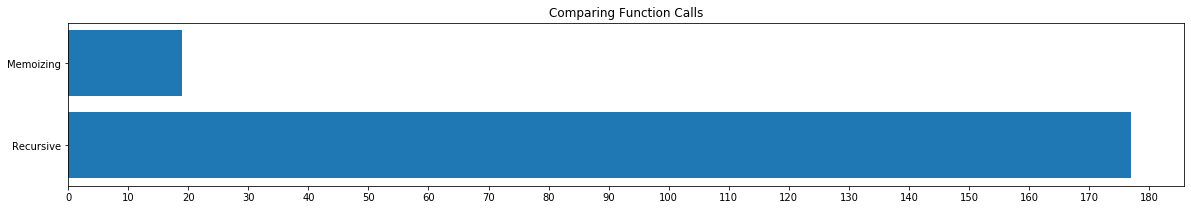

In [266]:
plt.figure(figsize=(20, 3))
plt.xticks(list(range(0,190,10)))
plt.barh(['Recursive','Memoizing'],[total_recur_10,total_memo_10])
plt.title('Comparing Function Calls')
plt.show()

In [268]:
growth_recur = {}
for i in range(1,11):
    x,recur_count = Recursive_fib(i)
    t_i = get_total(recur_count)
    growth_recur[i] = t_i
print('done')

done


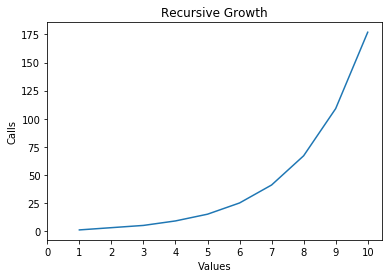

In [270]:
values, calls = zip(*sorted(growth_recur.items()))
plt.plot(values, calls)
plt.xlabel('Values')
plt.ylabel('Calls')
plt.xticks(list(range(0,11,1)))
plt.title('Recursive Growth')
plt.show()

In [272]:
growth_memo = {}
for i in range(1,11):
    x,memo_count = Memoizing_fib(i)
    t_i = get_total(memo_count)
    growth_memo[i] = t_i
print('done')

done


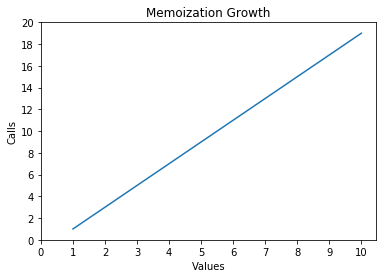

In [274]:
values, calls = zip(*sorted(growth_memo.items()))
plt.plot(values, calls)
plt.xlabel('Values')
plt.ylabel('Calls')
plt.xticks(list(range(0,11,1)))
plt.yticks(list(range(0,21,2)))
plt.title('Memoization Growth')
plt.show()